In [1]:
%matplotlib inline
import fastai
from fastai.vision.all import *
import cv2
from matplotlib import pyplot as plt
import numpy as np
import chess

In [61]:
def true_fen(fen):
    return fen.replace("-", "/")

def get_image_cells(fnames):
    cells = []

    img = cv2.imread(str(f))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    splitrows = np.split(img, 8, 0)

    blocks = []
    for rows in splitrows:    
        splitcells = np.split(rows, 8, 1)
        blocks.append(splitcells)

    cells.append(blocks)
    
    return cells

def fen_array(fen):
    ar = [[0 for y in range(8)] for x in range(8)]
    row, col = 0, 0
    for i, c in enumerate(fen):
        if c == "-" or c == "/":
            row += 1
            col = 0
        else:    
            if c.isnumeric():
                col += int(c)
            else:
                ar[row][col] = ord(c)
                col +=1
    return ar

def array_fen(ar):
    fen = ""
    for row, x in enumerate(ar):
        empty = 0
        for col, y in enumerate(x):
            if ar[row][col] == 0:
                empty += 1
                if col == 7:
                    fen += str(empty)
            else:
                if empty != 0:
                    fen += str(empty)
                empty = 0
                c = chr(ar[row][col])
                fen += c
                
            if col == 7 and row != 7:
                fen += "/"
    return fen

def pred_to_fen(predictions):
    fen = ""
    empty = 0
    for i, p in enumerate(predictions):
        p = int(p)
        if i % 8 == 0 and i != 0:
            if empty > 0:
                fen += str(empty)
                empty = 0
            fen += "/"

        if p == 0:
            empty += 1
            if i == 63:
                fen += str(empty)
        else:
            if empty > 0:
                fen += str(empty)
                empty = 0
            fen += chr(p)
    return fen

#return the 64 squares of the board from image
def get_squares(fpath):
    img = cv2.imread(str(fpath))
    img = cv2.resize(img, (400, 400))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.asarray(img)
    vsplit = np.split(img, 8, 0)
    vsplit = np.asarray(vsplit)
    squares = [np.split(s, 8, 1) for s in vsplit]
    squares = np.asarray(squares)
    squares = squares.reshape(64, 50, 50)
    return squares

def show_img(fpath):
    img = cv2.imread(str(fpath))
    plt.imshow(img)
    plt.show()

In [53]:
data_dir = Path("C:\Datasets\CHESS_BOARDS\lichess")

In [58]:
fnames = get_image_files(data_dir)
fnames

(#1) [Path('C:/Datasets/CHESS_BOARDS/lichess/1.PNG')]

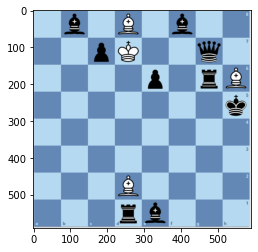

In [62]:
f = fnames[0]
show_img(f)

# load model

In [26]:
model_path = Path('C:\Datasets\CHESS_PIECES')
learn = load_learner(model_path / 'export.pkl')

In [63]:
squares = get_squares(f)
predictions = []
for s in squares:
    pred_class, pred_idx, outputs = learn.predict(s)
    predictions.append(pred_class)

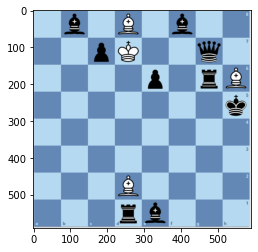

In [64]:
show_img(f)

In [65]:
pred_fen = pred_to_fen(predictions)
pred_fen

'1b1B1b2/2pK2q1/4p1rB/7k/8/8/3B4/3rb3'

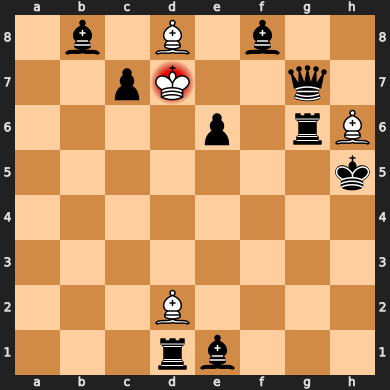

In [66]:
pred_board = chess.Board(pred_fen)
pred_board